In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray, rgba2rgb
from skimage.io import imread

img = imread('../data/images/mri/1.png')
mask = imread('../data/images/mask/1.png')
mask = rgb2gray(rgba2rgb(mask))
img = rgb2gray(rgba2rgb(img))
plt.gray()

<Figure size 432x288 with 0 Axes>

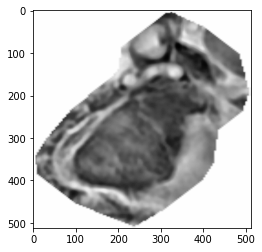

In [2]:
from lib.preprocessing import apply_mask,augment_region
from skimage.exposure import equalize_adapthist

aug_mask = augment_region(mask)
img = apply_mask(img, aug_mask)
mask = np.zeros(img.shape)
mask[img != 0] = 255
plt.imshow(img)

img = equalize_adapthist(img)
img = (( np.max(img) - img) / (np.max(img) - np.min(img)) * 255).astype('uint8')
plt.imshow(img)

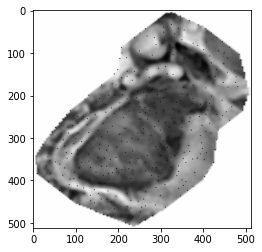

In [5]:
from skimage.feature.corner import  corner_shi_tomasi, corner_peaks
t= np.copy(img)
descriptors = corner_peaks(corner_shi_tomasi(img),min_distance=8)
for i,j in descriptors:
    t[i-1:i+1,j-1:j+1]=0
plt.imshow(t)

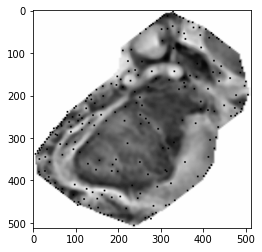

In [3]:
from skimage.feature import SIFT

feat_extr = SIFT()
feat_extr.detect_and_extract(img)
t = np.copy(img)
for k in feat_extr.keypoints:
    if mask[k[0],k[1]] != 255:
        continue
    t[ k[0]-2:k[0]+2, k[1]-2:k[1]+2 ]=1

plt.imshow(t)